<a href="https://colab.research.google.com/github/ybq9430/mnist/blob/main/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


#과제1
| 과제 1 | 作业 1 |
|--------|--------|
| train_image[6000] 이미지를 출력해서, 화면 캡쳐 후 코드와 함께 github 에 올릴 것. | 打印出 train_image[6000] 图像，截屏，并将其与代码一起上传到 GitHub。 |


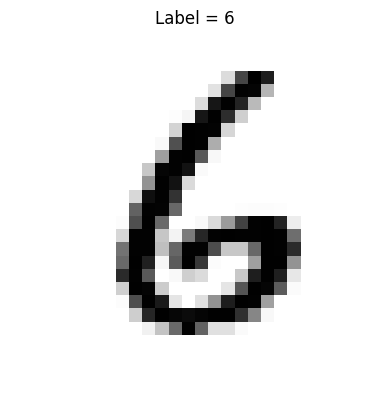

In [2]:
plt.imshow(train_images[6000], cmap='Greys')  # 灰度显示
plt.title(f"Label = {train_labels[6000]}")   # 显示标签，方便说明
plt.axis('off')
plt.show()


#과제2.
| 과제 2. | 作业 2. |
|-----------|-----------|
| train_image[1000] | train_image[1000] |
| train_image[2000] | train_image[2000] |
| train_image[3000] | train_image[3000] |
| train_image[4000] | train_image[4000] |
| 이미지를 | 显示以下图像： |
| ax1 | ax1 |
| ax2 | ax2 |
| ax3 | ax3 |
| ax4 | ax4 |
| 에 보이게 하고, 화면 캡쳐 후 코드와 함께 github 에 올릴 것. | 显示完成后进行截图，并将其与代码一起上传到 GitHub。 |



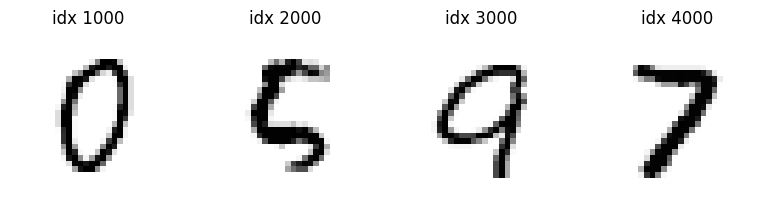

In [3]:
fig = plt.figure(figsize=(8, 2))

ax1 = fig.add_subplot(1, 4, 1)
ax2 = fig.add_subplot(1, 4, 2)
ax3 = fig.add_subplot(1, 4, 3)
ax4 = fig.add_subplot(1, 4, 4)

ax1.imshow(train_images[1000], cmap='Greys')
ax1.set_title("idx 1000")
ax1.axis('off')

ax2.imshow(train_images[2000], cmap='Greys')
ax2.set_title("idx 2000")
ax2.axis('off')

ax3.imshow(train_images[3000], cmap='Greys')
ax3.set_title("idx 3000")
ax3.axis('off')

ax4.imshow(train_images[4000], cmap='Greys')
ax4.set_title("idx 4000")
ax4.axis('off')

plt.tight_layout()
plt.show()


#과제 3
| 과제 3. | 作业 3. |
|--------|--------|
| model 만들 때, hidden layer의 노드 갯수 256을 128로 한 뒤, | 创建模型时，将隐藏层中的节点数从 256 更改为 128。 |
| model.summary() 실행 모습을 화면 캡쳐 후 코드와 함께 github 에 올릴 것. | 然后截取 model.summary() 执行时的截图，并将其与代码一起上传到 GitHub。 |


keras.layers.Dense(256, activation='relu')  -->  keras.layers.Dense(128, activation='relu'),

In [4]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),   # <- 这里改成 128
    keras.layers.Dense(10, activation='softmax')
])

# 모델 구조 출력 / 打印模型结构
model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

#과제 4
| 과제 4. | 作业 4. |
|--------|--------|
| 최적화 함수로 adam 대신 sgd 함수를 사용하여 compile 한 모습을 화면 캡쳐 후 코드와 함께 github 에 올릴 것. | 使用 sgd 函数而不是 adam 优化函数编译程序后，截取屏幕截图，并将其与代码一起上传到 GitHub。 |


optimizer='adam'  -->  optimizer='sgd'

In [5]:
model.compile(
    optimizer='sgd',                          # ← 这里从 'adam' 改成 'sgd'
    # 또는 keras.optimizers.SGD(learning_rate=0.01) 도 가능
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


#과제 5
| 과제 5. | 作业 5. |
|--------|--------|
| 성능 측정을 metrics=['accuracy'] 로 하였는데, epochs=2 일때의 accuracy의 값과 epochs=5 일때의 accuracy의 값을 비교해서 왜 다른지를 설명하는 것을 github 에 올릴 것. | 使用 metrics=['accuracy'] 来衡量性能。比较 epochs=2 和 epochs=5 时的准确率值，并解释它们差异的原因。将文件上传到 GitHub。 |


(1) epochs=2

In [6]:
# 과제5 - epochs=2 일 때의 성능
# 作业5 - epochs=2 时的性能

history2 = model.fit(
    train_images, train_labels,
    epochs=2,
    verbose=1
)

test_loss2, test_acc2 = model.evaluate(test_images, test_labels, verbose=0)
print("epochs=2 → test_accuracy:", test_acc2)


Epoch 1/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.2092 - loss: 171.9217
Epoch 2/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.2993 - loss: 1.9647
epochs=2 → test_accuracy: 0.22579999268054962


(2) epochs=5

In [7]:
# 새로운 모델 다시 정의 / 重新定义一个新模型
model2 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model2.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# epochs=5 로 학습 / 训练 5 个 epoch
history5 = model2.fit(
    train_images, train_labels,
    epochs=5,
    verbose=1
)

test_loss5, test_acc5 = model2.evaluate(test_images, test_labels, verbose=0)
print("epochs=5 → test_accuracy:", test_acc5)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8215 - loss: 6.8898
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9101 - loss: 0.3789
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9272 - loss: 0.2800
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9353 - loss: 0.2519
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9405 - loss: 0.2314
epochs=5 → test_accuracy: 0.9399999976158142


epochs=2 → test_accuracy: 0.22579999268054962

epochs=5 → test_accuracy: 0.9399999976158142
- epochs=2 의 경우 가중치가 충분히 학습되지 않아 정확도가 낮다.

- epochs=5 는 데이터셋을 더 많이 반복 학습하며 손실이 감소하고 정확도 증가.


- epoch 증가 → 성능 향상(단, 너무 크면 과적합 위험).

- 当 epoch=2 时，模型训练不足，权重尚未收敛，因此准确率较低。

- epoch=5 时，模型对数据重复训练更多次，权重得到更充分优化，准确率更高。

- epoch 越多学习越充分，但过多也可能导致过拟合